In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set_theme(palette="bright")

In [3]:
%%bash

TOTAL_BACTERIA_INTERACTIONS=$(cat ../../network/predicted_nets/bacteria/Merge_plus_TU/*net_predictions_TU | wc -l)

echo "NUmber of interactions predicted-Bacteria: ${TOTAL_BACTERIA_INTERACTIONS}"

TOTAL_ARCHAEA_INTERACTIONS=$(cat ../../network/predicted_nets/archael/Merge_plus_TU/*net_predictions_TU | wc -l)

echo "NUmber of interactions predicted-Archaea: ${TOTAL_ARCHAEA_INTERACTIONS}"

NUmber of interactions predicted-Bacteria: 29806482
NUmber of interactions predicted-Archaea: 78340


In [4]:
%%bash

#!/bin/bash


ShowHash() {

        local -n HASH=$1
        local KEY

        for KEY in "${!HASH[@]}"; do
                echo "[\"${KEY}\", ${HASH[$KEY]}]"
        done

}

declare -A COUNTS_ARC=( ["E_coli_K12"]=0 ["P_aeruginosa_PA01"]=0
        ["S_Typhimurium_LT2"]=0 ["B_subtilis_168"]=0
        ["S_aureus_N315"]=0 ["M_tuberculosis_H37Rv"]=0 
        ["[0-9]*_tu"]=0 )

declare -A COUNTS_BAC=( ["E_coli_K12"]=0 ["P_aeruginosa_PA01"]=0 
        ["S_Typhimurium_LT2"]=0 ["B_subtilis_168"]=0
        ["S_aureus_N315"]=0 ["M_tuberculosis_H37Rv"]=0 
        ["[0-9]*_tu"]=0 )

for LABEL in "${!COUNTS_ARC[@]}"; do

        CNT_LABEL=$(grep "${LABEL}" ../../network/predicted_nets/archael/Merge_plus_TU/*net_predictions_TU | wc -l)
        COUNTS_ARC[$LABEL]=$CNT_LABEL

        CNT_LABEL=$(grep "${LABEL}" ../../network/predicted_nets/bacteria/Merge_plus_TU/*net_predictions_TU | wc -l)
        COUNTS_BAC[$LABEL]=$CNT_LABEL

done

ShowHash COUNTS_ARC
printf "\n"
ShowHash COUNTS_BAC

["S_aureus_N315", 3275]
["M_tuberculosis_H37Rv", 10545]
["P_aeruginosa_PA01", 1961]
["[0-9]*_tu", 78131]
["E_coli_K12", 11941]
["B_subtilis_168", 6939]
["S_Typhimurium_LT2", 8671]

["S_aureus_N315", 1311045]
["M_tuberculosis_H37Rv", 3476130]
["P_aeruginosa_PA01", 1029230]
["[0-9]*_tu", 29789234]
["E_coli_K12", 5808850]
["B_subtilis_168", 2616899]
["S_Typhimurium_LT2", 3908752]


In [11]:
archaeal_counts = [["S_aureus_N315", 3275],
["M_tuberculosis_H37Rv", 10545],
["P_aeruginosa_PA01", 1961],
["TUs", 78131],
["E_coli_K12", 11941],
["B_subtilis_168", 6939],
["S_Typhimurium_LT2", 8671]]

archaeal_df = pd.DataFrame(archaeal_counts, columns=["Organism","Interactions retrieved"])
archaeal_df.sort_values(by="Interactions retrieved", inplace=True, ascending=False)

bacteria_counts = [["S_aureus_N315", 1311045],
["M_tuberculosis_H37Rv", 3476130],
["P_aeruginosa_PA01", 1029230],
["Tus", 29789234],
["E_coli_K12", 5808850],
["B_subtilis_168", 2616899],
["S_Typhimurium_LT2", 3908752]]

bacteria_df = pd.DataFrame(bacteria_counts, columns=["Organism","Interactions retrieved"])
bacteria_df.sort_values(by="Interactions retrieved", inplace=True, ascending=False)

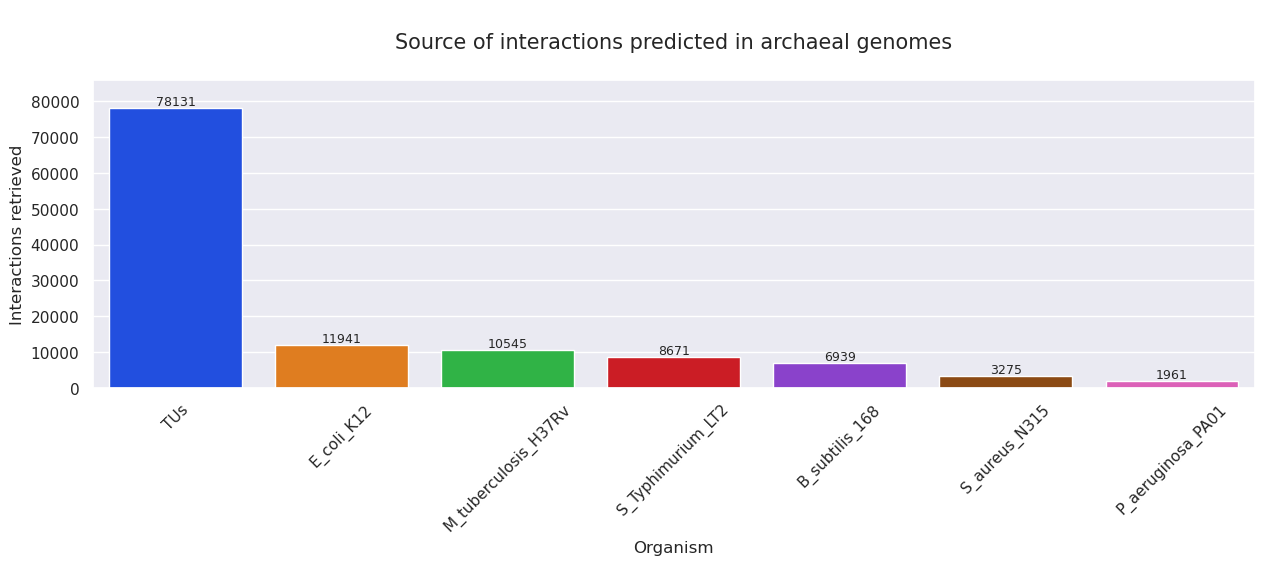

In [12]:
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(data=archaeal_df, x="Organism", y="Interactions retrieved",
            ax=axis)

axis.bar_label(axis.containers[0],size = 9)

axis.set_title("\nSource of interactions predicted in archaeal genomes\n", fontdict={"size":15})
axis.set_ymargin(0.1)
plt.xticks(rotation=45)
plt.show()

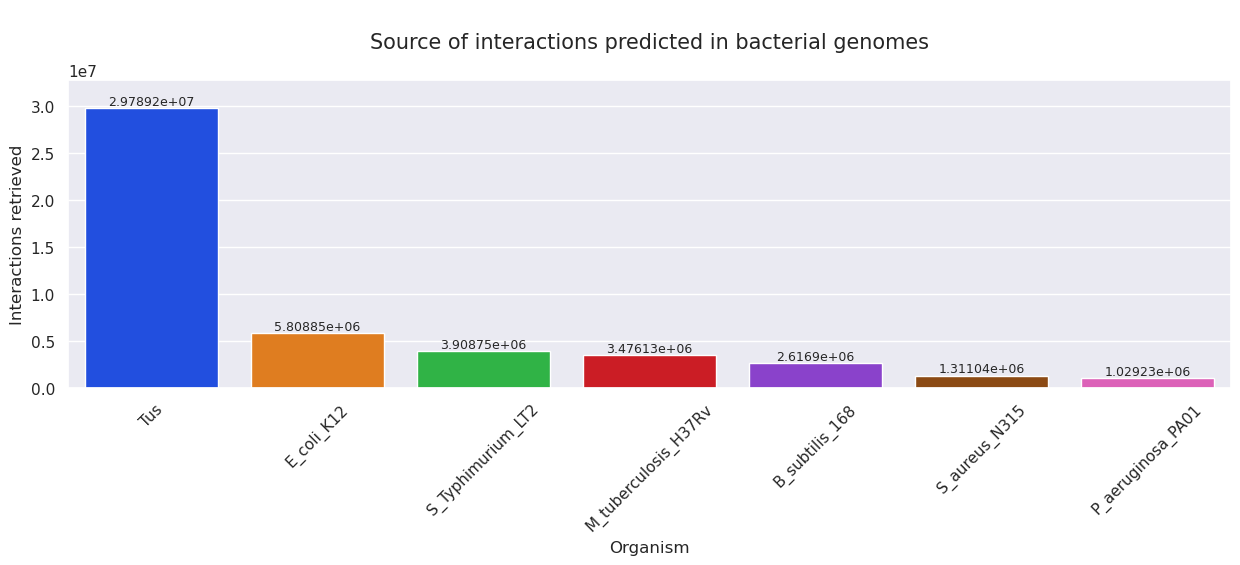

In [13]:
fig, axis = plt.subplots(1,1,figsize=(15,4))

sns.barplot(data=bacteria_df, x="Organism", y="Interactions retrieved",
            ax=axis)

axis.bar_label(axis.containers[0],size = 9)

axis.set_title("\nSource of interactions predicted in bacterial genomes\n", fontdict={"size":15})
axis.set_ymargin(0.1)
plt.xticks(rotation=45)
plt.show()